<a href="https://colab.research.google.com/github/DmitriiGoro/ML_2024_3_term/blob/master/LabWorks/lab02_part3_poetry_answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 2

### Part 3. Poetry generation

Let's try to generate some poetry using RNNs.

You have several choices here:

* The Shakespeare sonnets, file `sonnets.txt` available in the notebook directory.

* Роман в стихах "Евгений Онегин" Александра Сергеевича Пушкина. В предобработанном виде доступен по [ссылке](https://github.com/attatrol/data_sources/blob/master/onegin.txt).

* Some other text source, if it will be approved by the course staff.

Text generation can be designed in several steps:
    
1. Data loading.
2. Dictionary generation.
3. Data preprocessing.
4. Model (neural network) training.
5. Text generation (model evaluation).


In [ ]:
import string
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import torch
from torch import nn
import torch.nn.functional as F
from torch.optim import Adam,RMSprop
from torch.autograd import Variable
import numpy as np
from random import sample
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import matplotlib.pyplot as plt
np.random.seed(0)

### Data loading: Shakespeare

Shakespeare sonnets are awailable at this [link](http://www.gutenberg.org/ebooks/1041?msg=welcome_stranger). In addition, they are stored in the same directory as this notebook (`sonnetes.txt`). Simple preprocessing is already done for you in the next cell: all technical info is dropped.

In [ ]:
if not os.path.exists('sonnets.txt'):
    !wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_basic/homeworks_basic/lab02_deep_learning/sonnets.txt

with open('sonnets.txt', 'r') as iofile:
    text = iofile.readlines()

TEXT_START = 45
TEXT_END = -368
text = text[TEXT_START : TEXT_END]
assert len(text) == 2616

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [ ]:
# Join all the strings into one and lowercase it
# Put result into variable text.

# Your great code here
text = "".join(text).lower()

len(text)

# assert len(text) == 100225, 'Are you sure you have concatenated all the strings?'
# assert not any([x in set(text) for x in string.ascii_uppercase]), 'Uppercase letters are present'
# print('OK!')

NameError: name 'text' is not defined

### Data loading: "Евгений Онегин"


In [ ]:
!wget https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt

with open('onegin.txt', 'r') as iofile:
    text = iofile.readlines()

with open('onegin.txt') as input_file:
    quotes = input_file.read()[:-1].split('\n')
    quotes = [' ' + line for line in quotes]


text = [x.lower().replace('\t\t', '') for x in text]
text = [x.lower().replace('\n', '') for x in text]

MAX_LENGTH = max(map(len, text))
BATCH_SIZE = 1024
MAX_LENGTH

--2024-12-17 09:54:17--  https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262521 (256K) [text/plain]
Saving to: ‘onegin.txt.14’

onegin.txt.14       100%[===================>] 256.37K  --.-KB/s    in 0.02s   

2024-12-17 09:54:17 (11.2 MB/s) - ‘onegin.txt.14’ saved [262521/262521]



158

In [ ]:
text

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [ ]:
# Join all the strings into one and lowercase it
# Put result into variable text.

# Your great code here
# text = "".join(text).lower()
splited_text = text.split("\n")

Put all the characters, that you've seen in the text, into variable `tokens`.

In [ ]:
tokens = sorted(set("".join(text).lower()))

In [ ]:
tokens

[' ',
 '!',
 '(',
 ')',
 ',',
 '-',
 '.',
 '5',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 '[',
 ']',
 '^',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '«',
 '»',
 'а',
 'б',
 'в',
 'г',
 'д',
 'е',
 'ж',
 'з',
 'и',
 'й',
 'к',
 'л',
 'м',
 'н',
 'о',
 'п',
 'р',
 'с',
 'т',
 'у',
 'ф',
 'х',
 'ц',
 'ч',
 'ш',
 'щ',
 'ъ',
 'ы',
 'ь',
 'э',
 'ю',
 'я',
 'ё',
 '–',
 '—',
 '’',
 '…',
 '€']

Create dictionary `token_to_idx = {<char>: <index>}` and dictionary `idx_to_token = {<index>: <char>}`

In [ ]:
# dict <index>:<char>
# Your great code here
token_to_idx = {v: k for k, v in enumerate(tokens)}

# dict <char>:<index>
# Your great code here
idx_to_token = {k: v for k, v in enumerate(tokens)}

{' ': 0,
 '!': 1,
 '(': 2,
 ')': 3,
 ',': 4,
 '-': 5,
 '.': 6,
 '5': 7,
 '7': 8,
 '8': 9,
 '9': 10,
 ':': 11,
 ';': 12,
 '?': 13,
 '[': 14,
 ']': 15,
 '^': 16,
 'a': 17,
 'b': 18,
 'c': 19,
 'd': 20,
 'e': 21,
 'f': 22,
 'g': 23,
 'h': 24,
 'i': 25,
 'k': 26,
 'l': 27,
 'm': 28,
 'n': 29,
 'o': 30,
 'p': 31,
 'q': 32,
 'r': 33,
 's': 34,
 't': 35,
 'u': 36,
 'v': 37,
 'w': 38,
 'x': 39,
 'y': 40,
 'z': 41,
 '«': 42,
 '»': 43,
 'а': 44,
 'б': 45,
 'в': 46,
 'г': 47,
 'д': 48,
 'е': 49,
 'ж': 50,
 'з': 51,
 'и': 52,
 'й': 53,
 'к': 54,
 'л': 55,
 'м': 56,
 'н': 57,
 'о': 58,
 'п': 59,
 'р': 60,
 'с': 61,
 'т': 62,
 'у': 63,
 'ф': 64,
 'х': 65,
 'ц': 66,
 'ч': 67,
 'ш': 68,
 'щ': 69,
 'ъ': 70,
 'ы': 71,
 'ь': 72,
 'э': 73,
 'ю': 74,
 'я': 75,
 'ё': 76,
 '–': 77,
 '—': 78,
 '’': 79,
 '…': 80,
 '€': 81}

*Comment: in this task we have only 38 different tokens, so let's use one-hot encoding.*

### Building the model

Now we want to build and train recurrent neural net which would be able to something similar to Shakespeare's poetry.

Let's use vanilla RNN, similar to the one created during the lesson.

In [ ]:
def to_matrix(data, token_to_id, max_len=None, dtype='int32', batch_first = True):
    max_len = max_len or max(map(len, data))
    data_ix = np.zeros([len(data), max_len], dtype) + token_to_id[' ']

    for i in range(len(data)):
        line_ix = [token_to_id[c] for c in data[i]]
        data_ix[i, :len(line_ix)] = line_ix

    if not batch_first:
        data_ix = np.transpose(data_ix)

    return data_ix

In [ ]:
import torch

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

In [ ]:
num_tokens = len(tokens)

In [ ]:
# Your code here
class CharRNNCell(nn.Module):
    def __init__(self, num_tokens=len(tokens), embedding_size=15, rnn_num_units=1024):
        super(self.__class__,self).__init__()
        self.num_units = rnn_num_units

        self.embedding = nn.Embedding(num_tokens, embedding_size)
        self.rnn_update = nn.Linear(embedding_size + rnn_num_units, rnn_num_units)
        self.rnn_to_logits = nn.Linear(rnn_num_units, num_tokens)

    def forward(self, x, h_prev):
        x_emb = self.embedding(x)

        x_and_h = torch.cat([x_emb, h_prev], dim=1)
        h_next = self.rnn_update(x_and_h)
        h_next = F.tanh(h_next)

        assert h_next.size() == h_prev.size()

        logits = self.rnn_to_logits(h_next)

        return h_next, logits

    def initial_state(self, batch_size):
        return Variable(torch.zeros(batch_size, self.num_units))

In [ ]:
def rnn_loop(rnn, batch_index):
    batch_size, max_length = batch_index.size()
    hid_state = rnn.initial_state(batch_size).to(device)
    logprobs = []

    for x_t in batch_index.transpose(0,1):
        hid_state, logp_next = rnn(x_t, hid_state)
        logprobs.append(logp_next)

    return torch.stack(logprobs, dim=1)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
char_rnn = CharRNNCell().to(device)
opt = torch.optim.Adam(char_rnn.parameters())
history = []
loss_func = nn.CrossEntropyLoss()

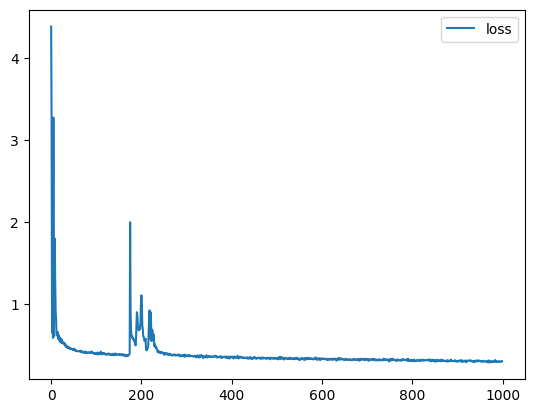

In [ ]:
for i in range(1000):
    batch_ix = to_matrix(sample(text, BATCH_SIZE), token_to_idx, max_len=MAX_LENGTH)
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64).to(device)

    logp_seq = rnn_loop(char_rnn, batch_ix)

    predictions_logp = logp_seq[:, :-1]
    actual_next_tokens = batch_ix[:, 1:]

    loss = loss_func(
    predictions_logp.reshape((-1, num_tokens)),
    actual_next_tokens.reshape(-1)
    )
    loss.backward()
    opt.step()
    opt.zero_grad()

    history.append(loss.cpu().data.numpy())

    if (i + 1) % 50 == 0:
      clear_output(True)
      plt.plot(history,label='loss')
      plt.legend()
      plt.show()

Plot the loss function (axis X: number of epochs, axis Y: loss function).

In [ ]:
def generate_sample(char_rnn, seed_phrase=' ', max_length=MAX_LENGTH, temperature=0.3):
    x_sequence = [token_to_idx[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    hid_state = char_rnn.initial_state(batch_size=1).to(device)

    for i in range(len(seed_phrase) - 1):
        hid_state, not_needed = char_rnn(x_sequence[:, i].to(device), hid_state)

    for _ in range(max_length - len(seed_phrase)):
        hid_state, logp_next = char_rnn(x_sequence[:, -1].to(device), hid_state)

        p_next = F.softmax(logp_next / temperature, dim=-1).cpu().data.numpy()[0]
        next_ix = np.random.choice(len(tokens), p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)

    return ''.join([tokens[ix] for ix in x_sequence.data.numpy()[0]])

In [ ]:
# # An example of generated text.
for _ in range(10):
    print(generate_sample(char_rnn, seed_phrase=' евгений ',temperature=0.2))

 евгений перово                                                                                                                                               
 евгений сторит                                                                                                                                               
 евгений воровет                                                                                                                                              
 евгений столи стора                                                                                                                                          
 евгений стора                                                                                                                                                
 евгений не влего                                                                                                                                             
 евгений стогони                              

In [ ]:
for _ in range(10):
    print(generate_sample(char_rnn, seed_phrase=' евгений ',temperature=0.4))

 евгений простой стодит                                                                                                                                       
 евгений вониць вереть                                                                                                                                        
 евгений стростя не прито                                                                                                                                     
 евгений слегот перубка,                                                                                                                                      
 евгений стить новаль                                                                                                                                         
 евгений вере пороринь                                                                                                                                        
 евгений стаж ни стронный                     

In [ ]:
for _ in range(10):
    print(generate_sample(char_rnn, seed_phrase=' евгений ',temperature=1))

 евгений поссранной рачкат                                                                                                                                    
 евгений додсы пы ботет дуж.ю                                                                                                                                 
 евгений ивл вамь                                                                                                                                             
 евгений дочулу, змоздесла.                                                                                                                                   
 евгений вилнях хонско…                                                                                                                                       
 евгений стобкобы падры но срал, не недно                                                                                                                     
 евгений ворлонолицы                          

### More poetic model

Let's use LSTM instead of vanilla RNN and compare the results.

Plot the loss function of the number of epochs. Does the final loss become better?

In [ ]:
# Your beautiful code here
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
class LSTMCell(nn.Module):
    def __init__(self, num_tokens=len(tokens), embedding_size=15, lstm_num_units=1024):
        super(self.__class__,self).__init__()
        self.num_units = lstm_num_units

        self.embedding = nn.Embedding(num_tokens, embedding_size)
        self.fc1 = nn.Linear(embedding_size + lstm_num_units, lstm_num_units)
        self.fc2 = nn.Linear(embedding_size + lstm_num_units, lstm_num_units)
        self.fc3 = nn.Linear(embedding_size + lstm_num_units, lstm_num_units)
        self.fc4 = nn.Linear(embedding_size + lstm_num_units, lstm_num_units)

        self.lstm_to_logits = nn.Linear(lstm_num_units, num_tokens)
    def forward(self, x, h_prev,c_prev):
        x_emb = self.embedding(x)
        x_and_h = torch.cat([x_emb, h_prev], dim=1)
        f=F.sigmoid(self.fc1(x_and_h))
        i=F.sigmoid(self.fc2(x_and_h))
        c=F.tanh(self.fc3(x_and_h))
        o=F.sigmoid(self.fc4(x_and_h))
        c_next = c_prev*f+i*c
        h_next = F.tanh(c_next)*o
        logits = self.lstm_to_logits(h_next)

        assert h_next.size() == h_prev.size()
        assert c_next.size() == c_prev.size()

        logits = self.lstm_to_logits(h_next)

        return h_next,c_next, F.log_softmax(logits, -1)

    def initial_state(self, batch_size):
        return Variable(torch.zeros(batch_size, self.num_units,dtype=torch.float32)),Variable(torch.zeros(batch_size, self.num_units,dtype=torch.float32))

Generate text using the trained net with different `temperature` parameter: `[0.1, 0.2, 0.5, 1.0, 2.0]`.

Evaluate the results visually, try to interpret them.

In [ ]:
# Text generation with different temperature values here
def lstm_loop(lstm, batch_index):
    batch_size, max_length = batch_index.size()
    hid_state,cell_state = lstm.initial_state(batch_size)
    hid_state=hid_state.to(device)
    cell_state=cell_state.to(device)
    logprobs = []

    for x_t in batch_index.transpose(0,1):
        hid_state, cell_state, logp_next = lstm(x_t, hid_state, cell_state)
        logprobs.append(logp_next)

    return torch.stack(logprobs, dim=1)

In [ ]:
char_lstm = LSTMCell().to(device)
opt = torch.optim.Adam(char_lstm.parameters())
history_lstm = []

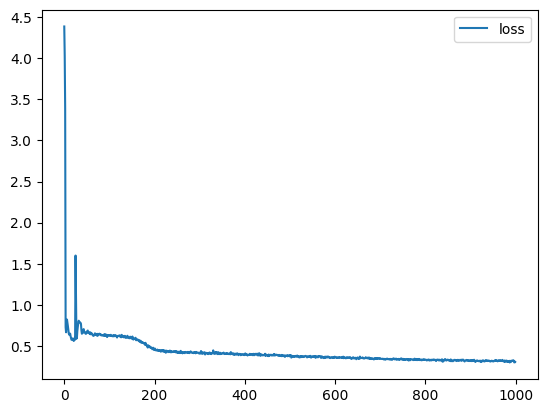

In [ ]:
for i in range(1000):
    batch_ix = to_matrix(sample(text, BATCH_SIZE), token_to_idx, max_len=MAX_LENGTH)
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64).to(device)

    logp_seq = lstm_loop(char_lstm, batch_ix)

    predictions_logp = logp_seq[:, :-1]
    actual_next_tokens = batch_ix[:, 1:]

    loss = -torch.mean(torch.gather(predictions_logp, dim=2, index=actual_next_tokens[:,:,None]))

    loss.backward()
    opt.step()
    opt.zero_grad()

    history_lstm.append(loss.cpu().data.numpy())

    if (i + 1) % 50 == 0:
      clear_output(True)
      plt.plot(history_lstm,label='loss')
      plt.legend()
      plt.show()

In [ ]:
def generate_sample_lstm(char_rnn, seed_phrase=' ', max_length=MAX_LENGTH, temperature=0.3):
    x_sequence = [token_to_idx[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    hid_state, cell_state = char_rnn.initial_state(batch_size=1)
    hid_state=hid_state.to(device)
    cell_state=cell_state.to(device)
    for i in range(len(seed_phrase) - 1):
        hid_state,cell_state, _ = char_rnn(x_sequence[:, i].to(device), hid_state, cell_state)

    for _ in range(max_length - len(seed_phrase)):
        hid_state, cell_state,logp_next = char_rnn(x_sequence[:, -1].to(device), hid_state, cell_state)
        p_next = F.softmax(logp_next / temperature, dim=-1).cpu().data.numpy()[0]

        next_ix = np.random.choice(len(tokens), p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)

    return ''.join([tokens[ix] for ix in x_sequence.cpu().data.numpy()[0]])

In [ ]:
for _ in range(10):
    print(generate_sample_lstm(char_lstm,seed_phrase=' евгений ',temperature=0.4))

 евгений сено пета                                                                                                                                            
 евгений вола сто нав                                                                                                                                         
 евгений толета смари,                                                                                                                                        
 евгений дет влой варона,                                                                                                                                     
 евгений но сте деный,                                                                                                                                        
 евгений сетилы                                                                                                                                               
 евгений на мони ветрый                       

In [ ]:
for _ in range(10):
    print(generate_sample_lstm(char_lstm,seed_phrase=' евгений ',temperature=0.1))

 евгений порет ворой                                                                                                                                          
 евгений сто порала                                                                                                                                           
 евгений сто порала                                                                                                                                           
 евгений сто пором                                                                                                                                            
 евгений поро порала                                                                                                                                          
 евгений пола стора                                                                                                                                           
 евгений порет орада                          

In [ ]:
for _ in range(10):
    print(generate_sample_lstm(char_lstm,seed_phrase=' евгений ',temperature=1.5))

 евгений влатьйхьымя     на ,                                                           m                                                                     
 евгений мччондт шу,кхнуснаж) онру,g«ий,                 –    р                                                                                               
 евгений лагжкае пувеё, о c                                                                                                                                   
 евгений гдррокгй роксы?нея ,                                                                       р                                                         
 евгений стайаз брией с раtприт, о  т    x                                                                                                                    
 евгений ановлоюст  илeзвроо,                                                                                                                                 
 евгений юта дудриц; з     »                  

### Saving and loading models

Save the model to the disk, then load it and generate text. Examples are available [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html]).

In [ ]:
# Saving and loading code here
torch.save(char_rnn.state_dict(), "rnn.pt")
torch.save(char_lstm.state_dict(), "lstm.pt")

### References
1. <a href='http://karpathy.github.io/2015/05/21/rnn-effectiveness/'> Andrew Karpathy blog post about RNN. </a>
There are several examples of genration: Shakespeare texts, Latex formulas, Linux Sourse Code and children names.
2. <a href='https://github.com/karpathy/char-rnn'> Repo with char-rnn code </a>
3. Cool repo with PyTorch examples: [link](https://github.com/spro/practical-pytorch`)